In [22]:
from pandas import DataFrame
from collections import defaultdict
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from collections import defaultdict
import pandas as pd
from pandas import DataFrame
import seaborn as sns
# import csv
# file = open('PI.csv', 'w', newline ='')

In [23]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/CMPE-252

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/CMPE-252


In [24]:
## LAYOUT OF THE GRID

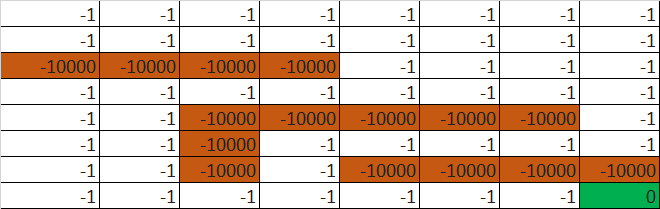

In [25]:
import numpy as np


#Hyperparameters

GAMMA = 0.9         
NOISE = 0.2 


#Define all states
all_states=[]
for i in range(8):
    for j in range(8):
            all_states.append((i,j))

#Define rewards for all states
rewards = {}
for i in all_states:
    if (i == (2,0) or i == (2,1) or i ==  (2,2)or i == (2,3)or i == (2,4)
   or i == (4,2)or i == (4,3)or i == (4,4)or i == (4,5)or i == (4,6)
        or i == (5,2) or i == (6,2)  or i == (6,4) 
    or i == (6,5) or i == (6,6) or i == (6,7)):
        rewards[i] = -10000
    elif i == (7,7):
        rewards[i] = 0
    else:
        rewards[i] = -1




In [26]:
size = 8
def possible_actions(grid, no):
    i , j = grid[no]
    
    actions = dict()

    if (j-1) >=0: actions['L'] = (grid[no -1],  rewards.get(grid[no-1]))
    else: actions['L'] = (grid[no], rewards.get(grid[no]))
    


    if (i-1) >=0: actions['U'] = (grid[no - 8],  rewards.get(grid[no-8]))
    else: actions['U'] = (grid[no],  rewards.get(grid[no]))

    if (j+1) < size: actions['R'] = (grid[no + 1],  rewards.get(grid[no+1]))
    else: actions['R'] = (grid[no],  rewards.get(grid[no]))

    if (i+1) < size: actions['D'] = (grid[no + 8],  rewards.get(grid[no+8]))
    else: actions['D'] = (grid[no],  rewards.get(grid[no]))


    return actions

In [27]:
possible_actions(all_states, 4)

{'D': ((1, 4), -1), 'L': ((0, 3), -1), 'R': ((0, 5), -1), 'U': ((0, 4), -1)}

In [28]:
actions = {} # not for walls or goal state, only for working nodes.

for i in all_states:
  if rewards[i] == -1:
    actions[i] = ('D', 'R', 'L', 'U')

In [29]:
#Define an initial policy
policy={}# not for walls or goal state, only for working nodes.
for s in actions.keys():
    policy[s] = np.random.choice(actions[s])

In [30]:
#Define initial value function 
V={} # for all nodes
for s in all_states:
    V[s] = 0


In [31]:


V[(7,7)] = 0


blocked_cells = [(2,0),(2,1) ,(2,2),(2,3),(2,4),(4,2),(4,3),(4,4),(4,5),(4,6) ,(5,2),(6,2) ,(6,4) ,(6,5),(6,6),(6,7)]

nrows, ncols = (8,8)

terminal_states = [(7,7)]
free_cells = [cell for cell, rewards in rewards.items() if(  cell not in (terminal_states and blocked_cells))]


In [32]:
gamma = .9
alpha = .2
new_V = {}
all_actions_information = []
delta = []

for cell in blocked_cells :
    new_V[cell] = 0
for cell in terminal_states:
    new_V[cell] = 0

def policy_evaluation(V,  policy, alpha):
  reward = 0
  # biggest_change = 0
  for index, s in enumerate(all_states):
    if s in policy:
      
      
      all_actions_information = possible_actions(all_states, index)
      for a in policy[s]:
        nxt = all_actions_information.get(a)[0] #nxt is the node i, j where the action will lead you to 


        nxt = tuple(nxt)
        v = rewards[nxt] + (GAMMA * V[nxt])
 
        new_V[s] = v

        reward += v  
        # biggest_change = max(biggest_change, np.abs(old_v - V[s]))
  return new_V, reward

In [33]:
def policy_improvment(V, policy , alpha):
  new_V = V
  
  for index, s in enumerate(all_states):
    biggest_change = 0
    if s in policy :
      all_rewards = []

      all_actions_information = possible_actions(all_states, index)
      for a in actions[s]:
          nxt = all_actions_information.get(a)[0]


          nxt = tuple(nxt)
          v = rewards[nxt] + (GAMMA * new_V[nxt])

          all_rewards.append((v,a))
      policy[s] = max(all_rewards)[1]
      a = max(all_rewards)[0]
      # print(a)
      biggest_change = max(biggest_change, np.abs(new_V[nxt]- a))
      delta.append(biggest_change)  

  return policy




In [34]:
accumulated_rewards = []
for i in range(1000):
  new_v, reward = policy_evaluation(V, policy, alpha )
  accumulated_rewards.append(reward)
  policy = policy_improvment(new_V, policy, alpha)
  V= new_V

In [35]:
def print_values(V):
  for i in range(8):
    print("----------------------------------------")
    for j in range(8):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")

def print_policy(P):
  for i in range(8):
    print("----------------------------------------")
    for j in range(8):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")  
    print("")

In [36]:
print_values(rewards)
print("*****************************************************")
print_values(V)
print("*****************************************************")
print_policy(policy)

----------------------------------------
-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|
----------------------------------------
-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|
----------------------------------------
-10000.00|-10000.00|-10000.00|-10000.00|-10000.00|-1.00|-1.00|-1.00|
----------------------------------------
-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|
----------------------------------------
-1.00|-1.00|-10000.00|-10000.00|-10000.00|-10000.00|-10000.00|-1.00|
----------------------------------------
-1.00|-1.00|-10000.00|-1.00|-1.00|-1.00|-1.00|-1.00|
----------------------------------------
-1.00|-1.00|-10000.00|-1.00|-10000.00|-10000.00|-10000.00|-10000.00|
----------------------------------------
-1.00|-1.00|-1.00|-1.00|-1.00|-1.00|-1.00| 0.00|
*****************************************************
----------------------------------------
-8.91|-8.78|-8.65|-8.50|-8.33|-8.15|-7.94|-7.71|
----------------------------------------
-8.78|-8.65|-8.50|-8.33|-8.15|-

In [37]:

V[(7,7)] = 0


blocked_cells = [(2,0),(2,1) ,(2,2),(2,3),(2,4),(4,2),(4,3),(4,4),(4,5),(4,6) ,(5,2),(6,2) ,(6,4) ,(6,5),(6,6),(6,7)]

nrows, ncols = (8,8)

terminal_states = [(7,7)]
free_cells = [cell for cell, rewards in rewards.items() if(  cell not in (terminal_states and blocked_cells))]


def visualize_path(state_values, visited, policy):
    # def optimal_path_():
    path = np.empty(shape=(nrows, ncols))

    for i in range(nrows):
        for j in range(ncols):
            if (i,j) in visited:
                path[(i,j)] = 1
            elif (i,j) in blocked_cells:
                path[(i,j)] = -1
            else:
                path[(i,j)] = 0

    fig, axs = plt.subplots(figsize=(10,8))
    axs = sns.heatmap(path, cmap="YlGnBu", linewidths=.5, ax=axs)
    plt.show()


def visualize_values(V, policy):

    node_x = [0]*8
    node_y = [0]*8
    policy_2d = [[ ' ' for i in range(8) ] for j in range(8)]
    V_2d = [[ ' ' for i in range(8) ] for j in range(8)]
    for x in range(0,8,1):
            node_x[x] = x
            node_y[x] = x
            for y in range(0,8,1):
    #             value_2d[x][y] = df_value[(8*x)+y]   
                if (x,y) in blocked_cells:
                        policy_2d[x][y] = 'Wall'
                        V_2d[x][y] = -10000
                elif (x, y) in terminal_states:
                        policy_2d[x][y] = 'Goal'
                        V_2d[x][y] = 0
                else:
                      policy_2d[x][y] = policy[(x, y)]
                      V_2d[x][y] = V[(x, y)]
                  
    plot_direction_df = DataFrame(V_2d, index=node_x, columns=node_y)
    fig, ax1 = plt.subplots(figsize=(15,10))
    ax1 = sns.heatmap(plot_direction_df, annot=policy_2d, fmt="", cmap = "YlGnBu")
    plt.show()
    
    fig, ax2 = plt.subplots(figsize=(15,10))
    ax2 = sns.heatmap(plot_direction_df, annot=True, fmt=".4f", cmap = "YlGnBu")
    plt.show()


def visualize(state_values, policy):

    visited = [(0,0)]
    for curr_cell_ in visited:
        i, j = curr_cell_ 
        temp = {}
        if ((i+1,j) in free_cells or (i+1,j) in terminal_states) and (i+1,j) not in visited: 
            temp[(i+1, j)] = state_values[(i+1,j)]

        if ((i-1,j) in free_cells or (i-1,j) in terminal_states) and (i-1,j) not in visited:
            temp[(i-1, j)] = state_values[(i-1,j)]

        if ((i,j+1) in free_cells or (i,j+1) in terminal_states) and (i,j+1) not in visited:
            temp[(i, j+1)] = state_values[(i,j+1)]

        if ((i,j-1) in free_cells or (i,j-1) in terminal_states) and (i,j-1) not in visited:
            temp[(i, j-1)] = state_values[(i,j-1)]

        temp_max = max(list(temp.values()))

        for x,y in temp.items():
            if y == temp_max:     next_cell_ = x

        visited.append(next_cell_)
        if next_cell_ == (7, 7) : break    

    visualize_path(state_values, visited, policy)
    visualize_values(state_values, policy)

#     return visited

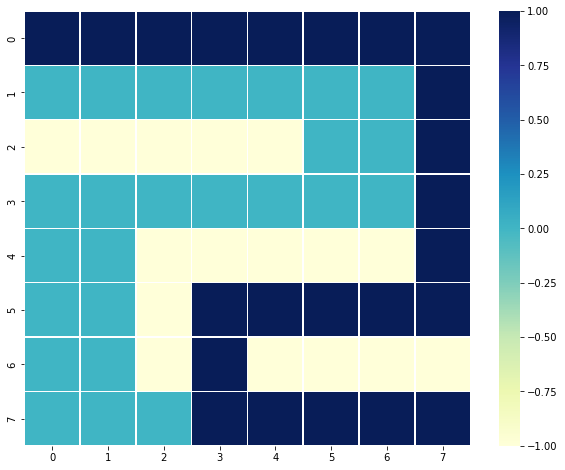

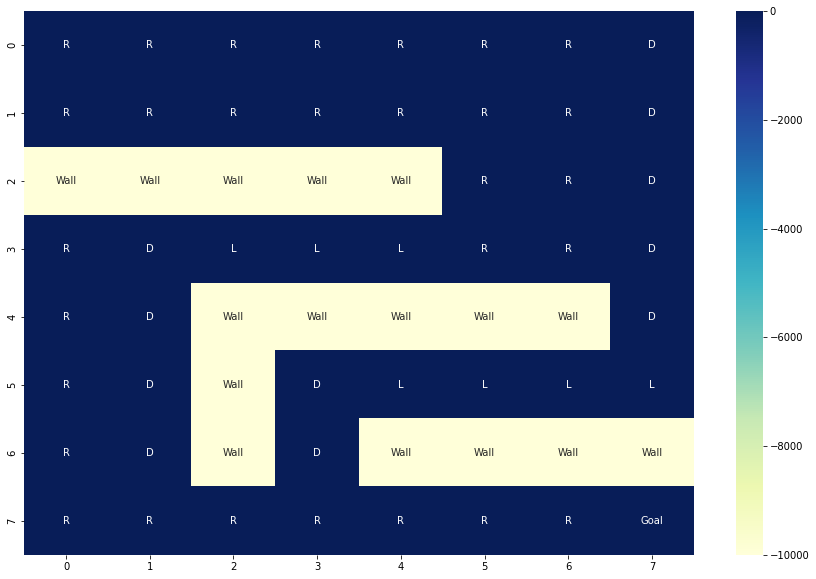

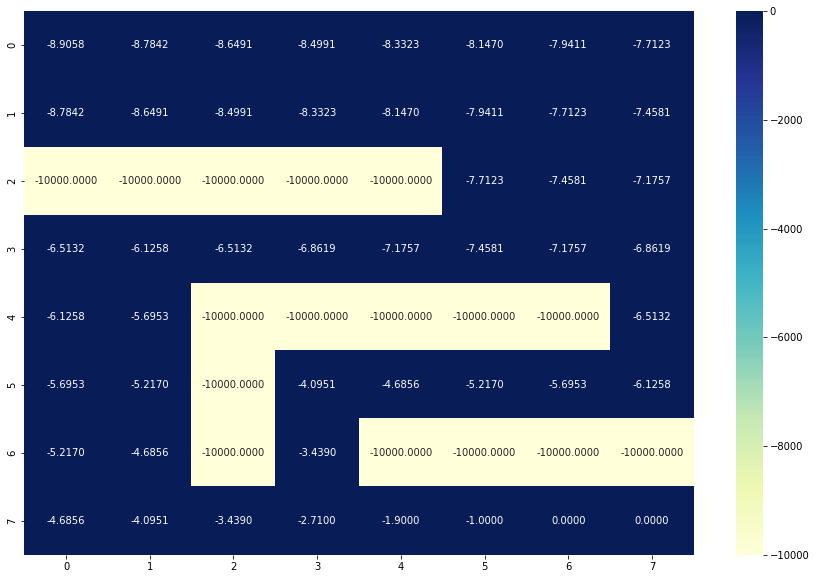

In [38]:
visualize(V, policy)

# Learning curve for policy iteration

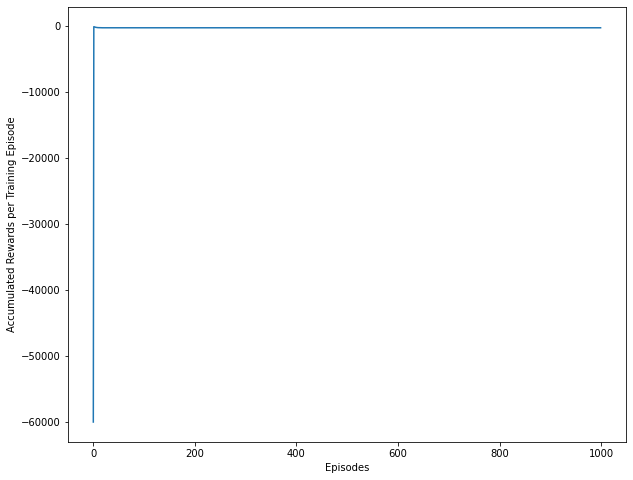

In [39]:
# rew = [np.mean(accumulated_rewards[1000*i:1000*(i+1)]) for i in range(CONST_N_EPISODES)]

acc_df = pd.DataFrame(accumulated_rewards, columns=['accumulated_rewards'])
acc_df.to_csv('pi_accumulated_rewards.csv',index=False)

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(accumulated_rewards)
ax.set(xlabel='Episodes', ylabel='Accumulated Rewards per Training Episode')
plt.show() 

# Delta - learning curve

In [40]:
accumulated_rewards
df = pd.DataFrame(delta, columns=['accumulated_rewards'])

In [41]:
df.to_csv('pi_delta.csv',index=False)
# from google.colab import files
# files.download('pi_delta.csv')


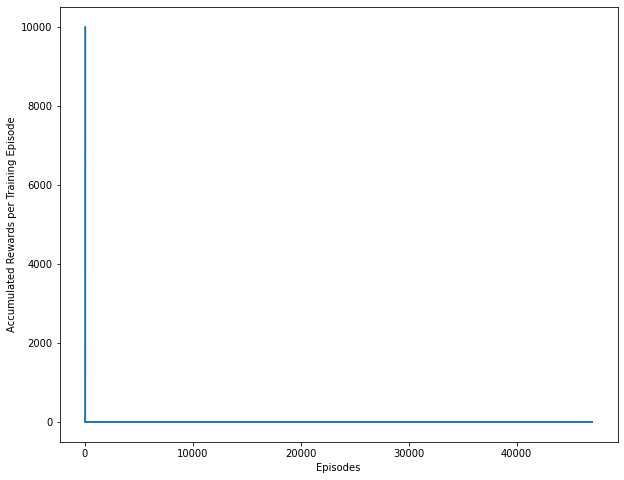

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(delta)
ax.set(xlabel='Episodes', ylabel='Accumulated Rewards per Training Episode')
plt.show() 